## * 라이브러리

In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할
from sklearn.model_selection import train_test_split

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 의사결정나무 & 시각화
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor

# 파라미터 조정
import optuna

# 평가지표
from sklearn.metrics import mean_squared_error

In [2]:
# 한글 깨짐 방지
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

## 1. 데이터 불러오기
- df_preprocessed : 인코딩까지 처리된 데이터

In [3]:
df_preprocessed= pd.read_csv("df_preprocessed1.csv", encoding = 'euc-kr')
df_preprocessed

,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2682.68,2010,72000,1,1,4,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,0,1,0
1,19162.00,2015,41000,3,1,4,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,0,1
2,6898.32,2011,46000,2,1,4,18.20,1199.0,88.70,5.0,...,0,1,0,0,0,0,0,0,0,0
3,9197.76,2012,87000,3,1,4,20.77,1248.0,88.76,7.0,...,0,1,0,0,0,0,0,0,0,0
4,27194.71,2013,40670,3,2,3,15.20,1968.0,140.80,5.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,10822.70,2016,41413,3,1,4,27.28,1047.0,69.00,5.0,...,0,0,0,0,0,0,0,0,0,1
6149,13474.72,2017,39015,2,1,4,17.00,1497.0,121.36,5.0,...,0,0,0,0,0,0,1,0,0,0
6150,27838.55,2018,6000,2,1,4,16.00,1368.0,160.00,5.0,...,0,0,0,0,0,0,0,0,1,0
6151,16203.39,2017,21380,3,1,4,24.30,1248.0,88.50,5.0,...,0,0,0,0,0,0,1,0,0,0


## 2. 데이터 분할 및 scale 변환

In [4]:
df_x = df_preprocessed.drop(columns = "Price")
df_y = df_preprocessed['Price']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                                 test_size = 0.3,
                                                                 random_state = 500)

In [5]:
df_train_x

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Name_Ambassador,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
2477,2017,20149,3,2,4,19.27,2143.0,167.62,5.0,0,...,1,0,0,0,0,0,0,0,0,0
554,2013,12100,2,2,4,9.90,1984.0,207.80,2.0,0,...,0,0,0,1,0,0,0,0,0,0
3477,2015,54339,3,1,3,22.54,1396.0,88.73,5.0,0,...,0,0,0,0,0,0,0,0,0,1
5135,2016,71156,3,1,4,26.59,1248.0,74.00,5.0,0,...,0,1,0,0,0,0,0,0,0,0
417,2018,40322,2,1,4,18.90,1197.0,81.86,5.0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,2017,61108,3,2,4,10.91,3198.0,197.00,7.0,0,...,0,0,1,0,0,0,0,0,0,0
3790,2011,63000,2,2,4,13.40,1997.0,135.10,5.0,0,...,0,0,0,0,0,1,0,0,0,0
273,2013,105000,3,1,3,12.05,2179.0,120.00,8.0,0,...,0,0,0,0,0,0,0,0,0,1
3905,2016,50296,3,2,3,11.36,2755.0,171.50,7.0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
y_train = df_train_y
y_test = df_test_y

In [7]:
scaler = StandardScaler()
X_train_scaled1 = pd.DataFrame(scaler.fit_transform(df_train_x), columns = df_train_x.columns)
X_test_scaled1 = pd.DataFrame(scaler.transform(df_test_x), columns = df_test_x.columns)

In [8]:
scaler = MinMaxScaler()
X_train_scaled2 = pd.DataFrame(scaler.fit_transform(df_train_x), columns = df_train_x.columns)
X_test_scaled2 = pd.DataFrame(scaler.transform(df_test_x), columns = df_test_x.columns)

In [9]:
scaler = RobustScaler()
X_train_scaled3 = pd.DataFrame(scaler.fit_transform(df_train_x), columns = df_train_x.columns)
X_test_scaled3 = pd.DataFrame(scaler.transform(df_test_x), columns = df_test_x.columns)

## 3. 모델 생성

### 3.1 기본 모델
- Training 데이터에 과적함 -> 파라미터 조정 필요

In [10]:
tree_model = DecisionTreeRegressor(random_state=500)
tree_model.fit(X_train_scaled1, y_train)
print("Score on Training set : {:.3f}".format(tree_model.score(X_train_scaled1, y_train )))
print("Score on Test set : {:.3f}".format(tree_model.score(X_test_scaled1, y_test )))

Score on Training set : 1.000
Score on Test set : 0.782


In [11]:
tree_model = DecisionTreeRegressor(random_state=500)
tree_model.fit(X_train_scaled2, y_train)
print("Score on Training set : {:.3f}".format(tree_model.score(X_train_scaled2, y_train )))
print("Score on Test set : {:.3f}".format(tree_model.score(X_test_scaled2, y_test )))

Score on Training set : 1.000
Score on Test set : 0.782


In [12]:
tree_model = DecisionTreeRegressor(random_state=500)
tree_model.fit(X_train_scaled3, y_train)
print("Score on Training set : {:.3f}".format(tree_model.score(X_train_scaled3, y_train )))
print("Score on Test set : {:.3f}".format(tree_model.score(X_test_scaled3, y_test )))

Score on Training set : 1.000
Score on Test set : 0.782


## 4. 모델 파라미터 조정

### 4.1 직접 파라미터 조정

##### ㅡ Max_depth  
: Depth의 파라미터 값이 증가할수록 Train Score는 증가하고 TestScore는 감소하는 경향을 볼 수 있다.  
이는 Test set에 대하여 과적합이 되고 있는 것으로 생각될 수 있으므로, TestScore가 높고, depth 크기가 적당해 해석에 용이한 7으로 결정하였다.

In [13]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=500, max_depth = v_max_depth)
    tree.fit(X_train_scaled2, y_train)
    train_score.append(tree.score(X_train_scaled2, y_train))
    test_score.append(tree.score(X_test_scaled2, y_test))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.495,0.519
1,2,0.625,0.630
2,3,0.743,0.721
3,4,0.799,0.742
4,5,0.849,0.790
5,6,0.883,0.793
6,7,0.919,0.804
7,8,0.939,0.779
8,9,0.956,0.803
9,10,0.969,0.767


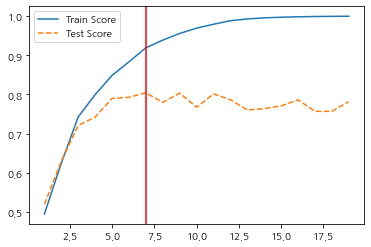

In [14]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.axvline(x=7, color='r')
plt.legend()

##### ㅡ Min_samples_leaf  
: Depth의 파라미터 값이 증가할수록 TrainScore는 꾸준히 감소하고, TestScore는 dir 일정한 구간에서 진동하고 있음을 확인할 수 있다.   
TtrainScore가 감소함에도 TestScore의 값이 증가한다고 보기어려워, Training 셋에 대한 과적합 해소로 인한 TrainScore의 감소가 아니라, 전반적인 데이터에 대해 모델의 설명력이 떨어진 것이라고 생각될 수 있을 것이다.  
이에 따라 TrainScore, TestScore가 가장 좋은 MinSamplesLeaf가 7일 떄의 경우를 선택하였다.

In [15]:
train_score = []; test_score = [ ]
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=500, max_depth = 7, min_samples_leaf=v_min_samples_leaf)
    tree.fit(X_train_scaled2, y_train)
    train_score.append(tree.score(X_train_scaled2, y_train))
    test_score.append(tree.score(X_test_scaled2, y_test))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.919,0.804
1,2,0.914,0.775
2,3,0.907,0.792
3,4,0.902,0.799
4,5,0.897,0.802
5,6,0.894,0.798
6,7,0.890,0.816
7,8,0.889,0.811
8,9,0.886,0.813
9,10,0.880,0.807


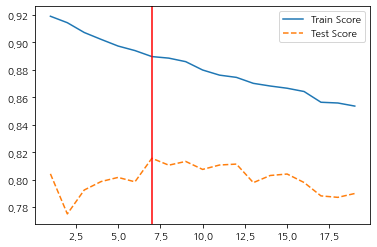

In [16]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.axvline(x=7, color='r')
plt.legend()

##### ㅡ Min_samples_split
: Min_samples_split의 파라미터 값이 증가할수록 TrainScore, TestScore 모두 꾸준히 감소하고 있음을 알 수 있다.  
TrainScore가 감소함에도 TestScore의 값이 증가한다고 보기어려워, Training 셋에 대한 과적합 해소로 인한 TrainScore의 감소가 아니라, 전반적인 데이터에 대해 모델의 설명력이 떨어진 것이라고 생각될 수 있을 것이다.  
이에 따라 과적합을 방지하기 위해 Min_samples_split을 충분히 큰 10으로 정하였다.

In [17]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=500, max_depth = 7, min_samples_leaf=7
                                 , min_samples_split=v_min_samples_split )
    tree.fit(X_train_scaled2, y_train)
    train_score.append(tree.score(X_train_scaled2, y_train))
    test_score.append(tree.score(X_test_scaled2, y_test))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.890,0.816
1,6,0.890,0.816
2,8,0.890,0.816
3,10,0.890,0.816
4,12,0.890,0.816
5,14,0.890,0.816
6,16,0.889,0.814
7,18,0.887,0.812
8,20,0.886,0.810
9,22,0.886,0.810


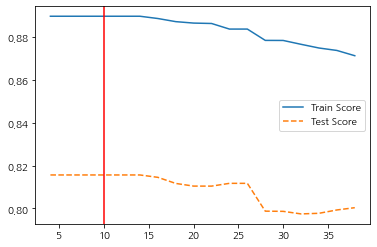

In [18]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.axvline(x=10, color='r')
plt.legend()

## 5.최종모델 선택

In [19]:
tree_model = DecisionTreeRegressor(random_state=500, min_samples_leaf=7, min_samples_split=10, max_depth = 7)
tree_model.fit(X_train_scaled2, y_train)
print("Score on Training set : {:.3f}".format(tree_model.score(X_train_scaled2, y_train )))
print("Score on Test set : {:.3f}".format(tree_model.score(X_test_scaled2, y_test )))

Score on Training set : 0.890
Score on Test set : 0.816


In [21]:
dot_data=export_graphviz(tree_model, out_file=None,
                feature_names = X_train_scaled2.columns, impurity = True, filled = True)
graph = graphviz.Source(dot_data)
graph.format = 'png'  # PNG 포맷으로 저장
graph.render('decision_tree')  # 'decision_tree.png'로 저장

'decision_tree.png'

### 5.1 feature importance
- Power가 트리를 생성하는 가장 중요한 변수임이 나타났음
- Power > Year > Engine > mileage 순으로 중요도가 높게 나타남

In [23]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_train_scaled2.columns
df_importance["Importance"] = tree_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,Power,0.744
0,Year,0.192
1,Kilometers_Driven,0.013
5,Mileage,0.010
26,Name_Mercedes-Benz,0.009
6,Engine,0.009
3,Transmission,0.008
27,Name_Mini,0.006
2,Fuel_Type,0.002
10,Name_Audi,0.002


Text(0, 0.5, '변수')

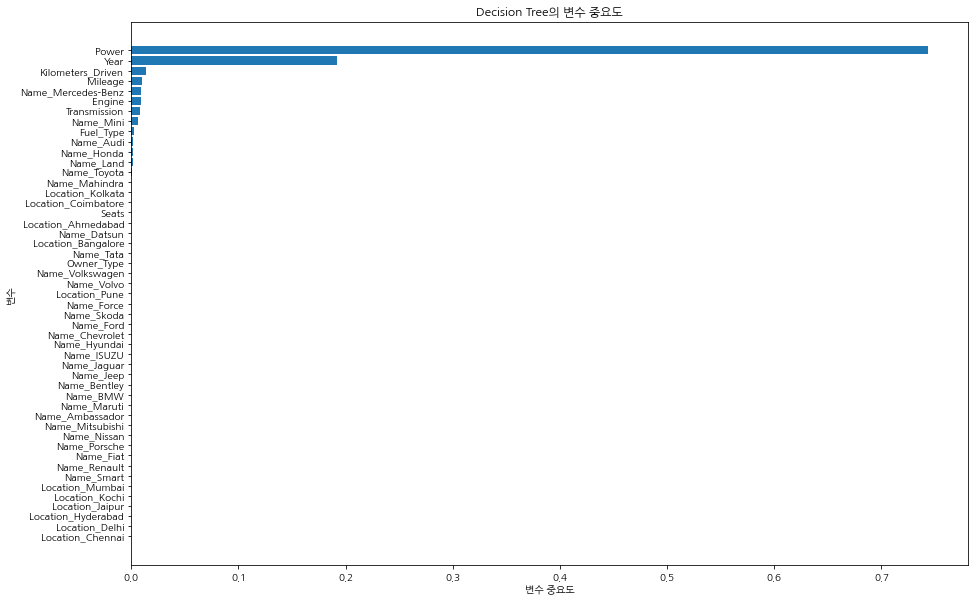

In [24]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize=(15,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.title('Decision Tree의 변수 중요도')
plt.xlabel("변수 중요도")
plt.ylabel("변수")